In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
X = np.load('/content/drive/MyDrive/Colab Notebooks/x_digits.npy')
y = np.load('/content/drive/MyDrive/Colab Notebooks/y_digits.npy')


In [4]:
print(X.shape)

(35631, 129, 71)


The X.shape print out shows that the shape of our X dataset size is 35631 samples, where each sample has a shape of 129 x 71. We will now divide the dataset into training, validation and test sets.

In [5]:

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=42, stratify=y_train_val)


In [6]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(25653, 129, 71)
(2851, 129, 71)
(7127, 129, 71)


To work with the fully connected neural network we need to convert the 2D array of shape into a 1D array to ensure the compatibility with the expected input shape. This is where reshaping come into play.

In [6]:
#Normalizing the data
X_train, X_val, X_test = X_train/255., X_val/255., X_test/255.

#Reshaping the dataset into 1D for the fully connected layers
X_train = X_train.reshape(X_train.shape[0], -1)
X_val = X_val.reshape(X_val.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [8]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(25653, 9159)
(2851, 9159)
(7127, 9159)


Since we are working with numbers from 0 to 9, we are defining 10 classes. This is done to ensure that y dataset is in the correct format for the neural network and data is suitable for classification tasks.

In [7]:
num_classes = 10
y_train_one_hot = to_categorical(y_train, num_classes)
y_val_one_hot = to_categorical(y_val, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)

In [10]:
print(y_train_one_hot.shape)
print(y_val_one_hot.shape)
print(y_test_one_hot.shape)

(25653, 10)
(2851, 10)
(7127, 10)


Visualizing the sample of the images in the dataset

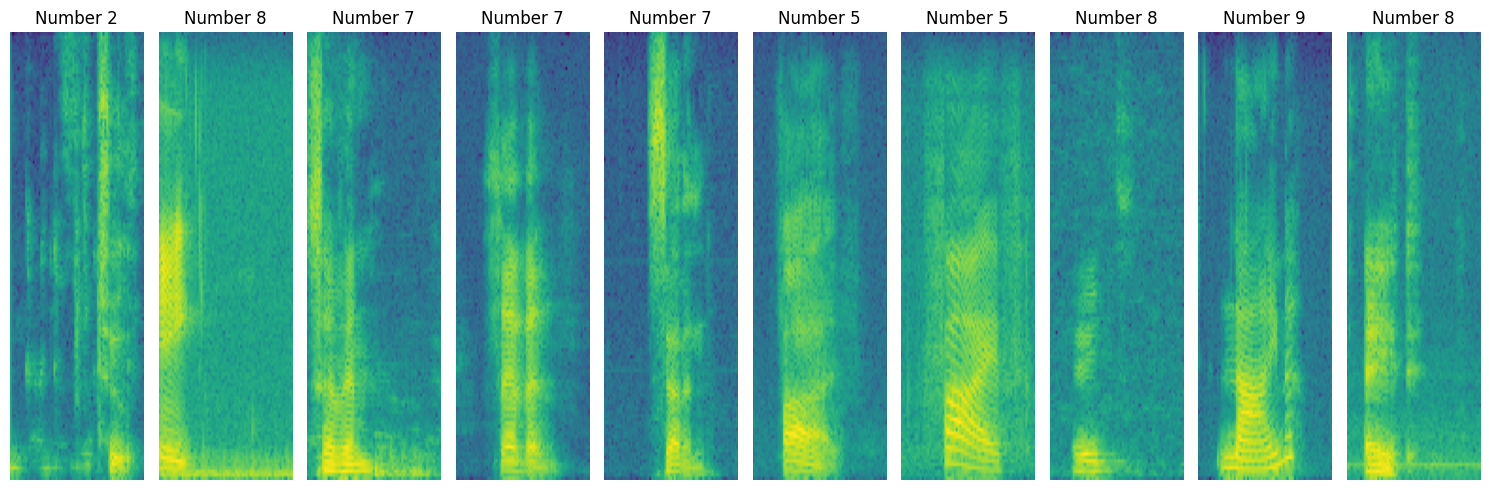

In [8]:
num_samples = 10

# Randomly select indices to visualize
indices = np.random.choice(X_train.shape[0], num_samples, replace=False)

# Plot the selected samples
plt.figure(figsize=(15, 5))

for i, idx in enumerate(indices):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(X_train[idx].reshape(129, 71), aspect='auto', origin='lower')
    plt.title(f'Number {np.argmax(y_train_one_hot[idx])}')  # Display the true label
    plt.axis('off')

plt.tight_layout()
plt.show()

# **Part 1: Building the fully connected neural network**

We are using 2 hidden layers with relu and softmax activation functions and adam optimizer.

In [10]:

tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape = [9159, ]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation = "relu"))
model.add(tf.keras.layers.Dense(128, activation = "relu"))
model.add(tf.keras.layers.Dense(10, activation = "softmax"))

model.compile(loss = "categorical_crossentropy", optimizer = 'adam', metrics = ["accuracy"])
history = model.fit(X_train, y_train_one_hot, epochs = 30, validation_data = (X_val, y_val_one_hot))

Epoch 1/30
802/802 ━━━━━━━━━━━━━━━━━━━━ 31s 36ms/step - accuracy: 0.4083 - loss: 1.6640 - val_accuracy: 0.7194 - val_loss: 0.8209
Epoch 2/30
802/802 ━━━━━━━━━━━━━━━━━━━━ 26s 32ms/step - accuracy: 0.7337 - loss: 0.8026 - val_accuracy: 0.7938 - val_loss: 0.6168
Epoch 3/30
802/802 ━━━━━━━━━━━━━━━━━━━━ 42s 34ms/step - accuracy: 0.8058 - loss: 0.5791 - val_accuracy: 0.8120 - val_loss: 0.5448
Epoch 4/30
802/802 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.8472 - loss: 0.4611 - val_accuracy: 0.8239 - val_loss: 0.5267
Epoch 5/30
802/802 ━━━━━━━━━━━━━━━━━━━━ 28s 35ms/step - accuracy: 0.8711 - loss: 0.3898 - val_accuracy: 0.8376 - val_loss: 0.5058
Epoch 6/30
802/802 ━━━━━━━━━━━━━━━━━━━━ 40s 34ms/step - accuracy: 0.8951 - loss: 0.3227 - val_accuracy: 0.8404 - val_loss: 0.5139
Epoch 7/30
802/802 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.9080 - loss: 0.2785 - val_accuracy: 0.8460 - val_loss: 0.5254
Epoch 8/30
802/802 ━━━━━━━━━━━━━━━━━━━━ 43s 37ms/step - accuracy: 0.9200 - loss: 0.2410 - 

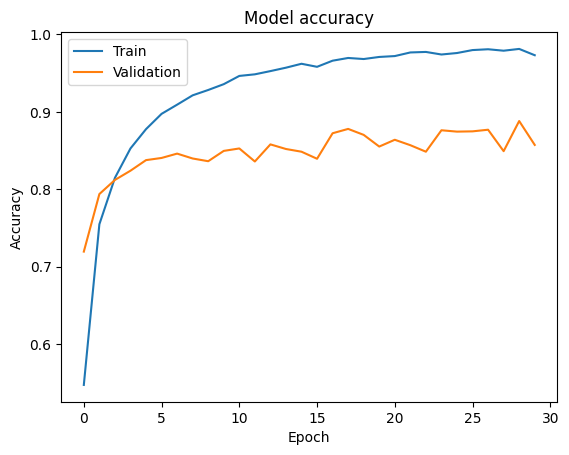

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

According to the figure above, the best accuracy is achieved in approximately 29th epoch, which maximizes the training and validation dataset accuracy. However, the validation accuracy is pretty bad compared to the training dataset. This is something we will aim to optimize.

In [12]:
print("Loss + accuracy on train data: {}".format(model.evaluate(X_train, y_train_one_hot)))
print("Loss + accuracy on test data: {}".format(model.evaluate(X_test, y_test_one_hot)))

802/802 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9557 - loss: 0.1502
Loss + accuracy on train data: [0.15344983339309692, 0.9547811150550842]
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8600 - loss: 0.7788
Loss + accuracy on test data: [0.7715481519699097, 0.8567419648170471]


We can see that our model is overfitting. The train data accuracy is 0.95 which test data accuracy is only 0.85. Means we can definitely improve our model to perform better.

# **Fine tuning the hyperparameters of a neural network**

We are going to use callbacks, such as early stopping and reduction of learning rate plateau, to find the best hyperparameters for finetuning our model.

In [22]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
learning_rate = tf.keras.callbacks.ReduceLROnPlateau(factor = 0.5, patience = 2)

optimizer = tf.keras.optimizers.AdamW(learning_rate = 0.001, weight_decay = 0.002)
model.compile(loss = "categorical_crossentropy", optimizer = optimizer, metrics = ["accuracy"])

history=model.fit(X_train, y_train_one_hot, epochs=10, validation_data=(X_val, y_val_one_hot),
          callbacks=[early_stopping, learning_rate])

Epoch 1/10
802/802 ━━━━━━━━━━━━━━━━━━━━ 35s 42ms/step - accuracy: 0.9410 - loss: 0.1715 - val_accuracy: 0.8636 - val_loss: 0.5613 - learning_rate: 0.0010
Epoch 2/10
802/802 ━━━━━━━━━━━━━━━━━━━━ 41s 42ms/step - accuracy: 0.9468 - loss: 0.1556 - val_accuracy: 0.8639 - val_loss: 0.5572 - learning_rate: 0.0010
Epoch 3/10
802/802 ━━━━━━━━━━━━━━━━━━━━ 42s 43ms/step - accuracy: 0.9511 - loss: 0.1357 - val_accuracy: 0.8646 - val_loss: 0.5555 - learning_rate: 0.0010
Epoch 4/10
802/802 ━━━━━━━━━━━━━━━━━━━━ 37s 38ms/step - accuracy: 0.9557 - loss: 0.1258 - val_accuracy: 0.8688 - val_loss: 0.5714 - learning_rate: 0.0010
Epoch 5/10
802/802 ━━━━━━━━━━━━━━━━━━━━ 42s 39ms/step - accuracy: 0.9613 - loss: 0.1125 - val_accuracy: 0.8674 - val_loss: 0.5999 - learning_rate: 0.0010
Epoch 6/10
802/802 ━━━━━━━━━━━━━━━━━━━━ 39s 37ms/step - accuracy: 0.9646 - loss: 0.1014 - val_accuracy: 0.8748 - val_loss: 0.5983 - learning_rate: 5.0000e-04


In [23]:
print("Loss + accuracy on train data: {}".format(model.evaluate(X_train, y_train_one_hot)))
print("Loss + accuracy on test data: {}".format(model.evaluate(X_test, y_test_one_hot)))

802/802 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9589 - loss: 0.1156
Loss + accuracy on train data: [0.11790980398654938, 0.9580556154251099]
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8815 - loss: 0.5093
Loss + accuracy on test data: [0.5450507402420044, 0.8784902691841125]


We have managed to improve the accuracy on both train and val dataset. Train accuracy = 0.99 and Validation accuracy = 0.90

Lets see if we can improve these numbers any further by increasing the learning rate.

In [14]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
learning_rate = tf.keras.callbacks.ReduceLROnPlateau(factor = 0.5, patience = 2)

optimizer = tf.keras.optimizers.AdamW(learning_rate = 0.01, weight_decay = 0.002)
model.compile(loss = "categorical_crossentropy", optimizer = optimizer, metrics = ["accuracy"])

history=model.fit(X_train, y_train_one_hot, epochs=10, validation_data=(X_val, y_val_one_hot),
          callbacks=[early_stopping, learning_rate])

Epoch 1/10
802/802 ━━━━━━━━━━━━━━━━━━━━ 34s 40ms/step - accuracy: 0.6876 - loss: 1.1521 - val_accuracy: 0.7254 - val_loss: 0.8369 - learning_rate: 0.0100
Epoch 2/10
802/802 ━━━━━━━━━━━━━━━━━━━━ 42s 41ms/step - accuracy: 0.7489 - loss: 0.7642 - val_accuracy: 0.7397 - val_loss: 0.8313 - learning_rate: 0.0100
Epoch 3/10
802/802 ━━━━━━━━━━━━━━━━━━━━ 38s 38ms/step - accuracy: 0.7771 - loss: 0.6980 - val_accuracy: 0.7106 - val_loss: 0.9363 - learning_rate: 0.0100
Epoch 4/10
802/802 ━━━━━━━━━━━━━━━━━━━━ 43s 40ms/step - accuracy: 0.7796 - loss: 0.6945 - val_accuracy: 0.7569 - val_loss: 0.8150 - learning_rate: 0.0100
Epoch 5/10
802/802 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.7984 - loss: 0.6378 - val_accuracy: 0.7394 - val_loss: 0.8861 - learning_rate: 0.0100
Epoch 6/10
802/802 ━━━━━━━━━━━━━━━━━━━━ 42s 42ms/step - accuracy: 0.7977 - loss: 0.6469 - val_accuracy: 0.7618 - val_loss: 0.7678 - learning_rate: 0.0100
Epoch 7/10
802/802 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.8182 - l

In [15]:
print("Loss + accuracy on train data: {}".format(model.evaluate(X_train, y_train_one_hot)))
print("Loss + accuracy on test data: {}".format(model.evaluate(X_test, y_test_one_hot)))

802/802 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9140 - loss: 0.2584
Loss + accuracy on train data: [0.261660635471344, 0.9126808047294617]
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8557 - loss: 0.4969
Loss + accuracy on test data: [0.5194240808486938, 0.8515504598617554]


Looking at the results of training data vs test data, we can see that model has increased its performance on the unseen data with mild overfitting. Lets try with the Sigmoid optimizer.

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
learning_rate = tf.keras.callbacks.ReduceLROnPlateau(factor = 0.5, patience = 2)

optimizer = tf.keras.optimizers.SGD(learning_rate = 0.1)
model.compile(loss = "categorical_crossentropy", optimizer = optimizer, metrics = ["accuracy"])

history=model.fit(X_train, y_train_one_hot, epochs=10, validation_data=(X_val, y_val_one_hot),
          callbacks=[early_stopping, learning_rate])


Epoch 1/10
802/802 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.9266 - loss: 0.2135 - val_accuracy: 0.8608 - val_loss: 0.5613 - learning_rate: 0.1000
Epoch 2/10
802/802 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.9317 - loss: 0.2008 - val_accuracy: 0.8611 - val_loss: 0.5634 - learning_rate: 0.1000
Epoch 3/10
802/802 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9351 - loss: 0.1891 - val_accuracy: 0.8604 - val_loss: 0.5736 - learning_rate: 0.1000
Epoch 4/10
802/802 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.9401 - loss: 0.1745 - val_accuracy: 0.8632 - val_loss: 0.5476 - learning_rate: 0.0500
Epoch 5/10
802/802 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step - accuracy: 0.9423 - loss: 0.1661 - val_accuracy: 0.8615 - val_loss: 0.5486 - learning_rate: 0.0500
Epoch 6/10
802/802 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.9435 - loss: 0.1615 - val_accuracy: 0.8629 - val_loss: 0.5521 - learning_rate: 0.0500
Epoch 7/10
802/802 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9452 - l

In [21]:
print("Loss + accuracy on train data: {}".format(model.evaluate(X_train, y_train_one_hot)))
print("Loss + accuracy on test data: {}".format(model.evaluate(X_test, y_test_one_hot)))

802/802 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9511 - loss: 0.1387
Loss + accuracy on train data: [0.14277133345603943, 0.9499083757400513]
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8802 - loss: 0.4793
Loss + accuracy on test data: [0.5151899456977844, 0.8769468069076538]


Based on the findings, seems that the first and third attempts were the most successful, which produced these results:

Train data accuracy = 0.95
Test data accuracy = 0.88

These results suggest hat the model is performing well without significant overfitting.


# **Saving the model**

We have decided that we liked the results of the model after fine tuning the hyperparameters with Adam optimizer at 0.001 learning rate.

In [30]:
model.save("my_keras_model.keras")

# **Predictions**

The predictions are made using the saved model.

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


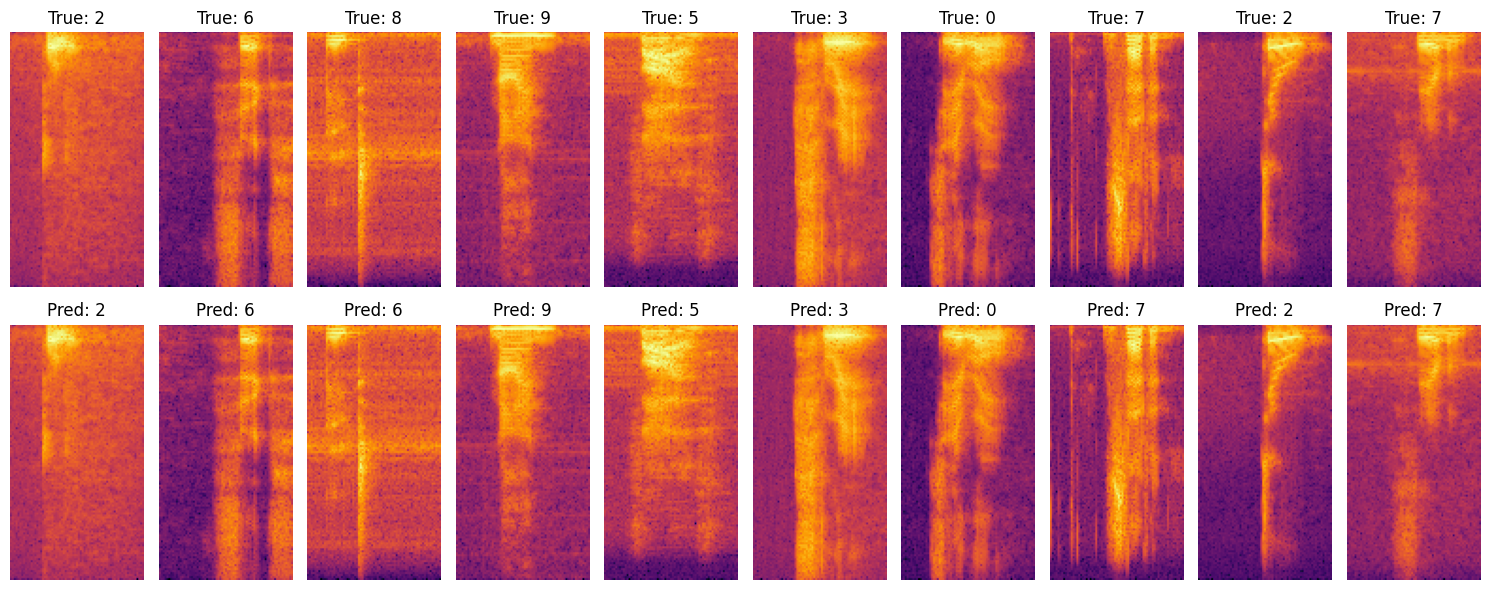

Prediction accuracy on the test set: 87.85%


In [31]:
model = tf.keras.models.load_model("my_keras_model.keras")

# Generate predictions
predictions = model.predict(X_test)

# Convert the one-hot encoded predictions to the digit (class) by taking the argmax
predicted_digits = np.argmax(predictions, axis=1)

# Convert y_test back to integer labels
true_digits = np.argmax(y_test_one_hot, axis=1)

# Let's visualize the results for a few samples
num_samples = 10  # Change this to see more/less examples
plt.figure(figsize=(15, 6))

for i in range(num_samples):
    plt.subplot(2, num_samples, i + 1)  # Top row for true labels
    plt.imshow(X_test[i].reshape(129, 71), aspect='auto', cmap='inferno')  # Show spectrogram
    plt.title(f"True: {true_digits[i]}")
    plt.axis('off')

    plt.subplot(2, num_samples, i + 1 + num_samples)  # Bottom row for predicted labels
    plt.imshow(X_test[i].reshape(129, 71), aspect='auto', cmap='inferno')  # Show spectrogram
    plt.title(f"Pred: {predicted_digits[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Optional: Calculate the accuracy of predictions
accuracy = np.mean(predicted_digits == true_digits)
print(f"Prediction accuracy on the test set: {accuracy * 100:.2f}%")


The model performs rather good on the test set and made predictions with 1 mistake out of 10 predictions and scoring with 87% accuracy.

# **Part 2: Building a convolutional neural network**

Repeating the first steps for convenience before building the new model

In [4]:
X = np.load('/content/drive/MyDrive/Colab Notebooks/x_digits.npy')
y = np.load('/content/drive/MyDrive/Colab Notebooks/y_digits.npy')

In [4]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=42, stratify=y_train_val)


In [6]:
X_train, X_val, X_test = X_train/255., X_val/255., X_test/255.

X_train = X_train.reshape([-1, 129, 71, 1])
X_val = X_val.reshape([-1, 129, 71, 1])
X_test = X_test.reshape([-1, 129, 71, 1])

In [7]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(25653, 129, 71, 1)
(2851, 129, 71, 1)
(7127, 129, 71, 1)


In [8]:
num_classes = 10
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes)
y_val_one_hot = tf.keras.utils.to_categorical(y_val, num_classes)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes)

In [9]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(X_train[0].shape))
model.add(tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer = "he_normal", padding="same"))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer = "he_normal", padding="same"))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer = "he_normal", padding="same"))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu', kernel_initializer = "he_normal"))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

The convolutional model consists of these decisions:



1.   3 convolutional layers
2.   Each convolution layer is followed by a max pooling layer to downsample
3. Flatten() layer prepared the output from consolutional layers for input into the dense layers (turning 2d feature maps into a 1d feature vector)

These choices should allow to minimize the usage of limited GPU resources while performing the classification task



# **Fine tuning the hyperparameters**

In [10]:
EarlyStoppingCB = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", patience = 5, restore_best_weights = "True")
LearningRateCB = tf.keras.callbacks.ReduceLROnPlateau(factor = 0.5, patience = 2)

optimizer = tf.keras.optimizers.AdamW(learning_rate = 0.001)
model.compile(loss = "categorical_crossentropy", optimizer = optimizer, metrics = ["accuracy"])
history = model.fit(X_train, y_train_one_hot, epochs = 10, validation_data = (X_val, y_val_one_hot), callbacks = [EarlyStoppingCB, LearningRateCB])

Epoch 1/10
802/802 ━━━━━━━━━━━━━━━━━━━━ 222s 273ms/step - accuracy: 0.5137 - loss: 1.3884 - val_accuracy: 0.8551 - val_loss: 0.4600 - learning_rate: 0.0010
Epoch 2/10
802/802 ━━━━━━━━━━━━━━━━━━━━ 254s 263ms/step - accuracy: 0.8906 - loss: 0.3442 - val_accuracy: 0.9211 - val_loss: 0.2458 - learning_rate: 0.0010
Epoch 3/10
802/802 ━━━━━━━━━━━━━━━━━━━━ 263s 264ms/step - accuracy: 0.9357 - loss: 0.1966 - val_accuracy: 0.9323 - val_loss: 0.2066 - learning_rate: 0.0010
Epoch 4/10
802/802 ━━━━━━━━━━━━━━━━━━━━ 256s 257ms/step - accuracy: 0.9548 - loss: 0.1374 - val_accuracy: 0.9295 - val_loss: 0.2242 - learning_rate: 0.0010
Epoch 5/10
802/802 ━━━━━━━━━━━━━━━━━━━━ 205s 256ms/step - accuracy: 0.9668 - loss: 0.0995 - val_accuracy: 0.9327 - val_loss: 0.2201 - learning_rate: 0.0010
Epoch 6/10
802/802 ━━━━━━━━━━━━━━━━━━━━ 262s 255ms/step - accuracy: 0.9830 - loss: 0.0572 - val_accuracy: 0.9442 - val_loss: 0.1982 - learning_rate: 5.0000e-04
Epoch 7/10
802/802 ━━━━━━━━━━━━━━━━━━━━ 263s 256ms/step - ac

In [11]:
print("Loss + accuracy on train data: {}".format(model.evaluate(X_train, y_train_one_hot)))
print("Loss + accuracy on test data: {}".format(model.evaluate(X_test, y_test_one_hot)))

802/802 ━━━━━━━━━━━━━━━━━━━━ 62s 78ms/step - accuracy: 0.9902 - loss: 0.0333
Loss + accuracy on train data: [0.03274053335189819, 0.9900596141815186]
223/223 ━━━━━━━━━━━━━━━━━━━━ 17s 74ms/step - accuracy: 0.9451 - loss: 0.2081
Loss + accuracy on test data: [0.21218526363372803, 0.9454188346862793]


The results are incredible when working with the selected hyperparameters of the model.

Train data accuracy = 0.99
Test data accuracy = 0.945

Model is robust and can easily adapt to the unseen data.
Such great performance has been achieved within mere 10 epochs compared to the fully connected neural network that took 30 epochs and many more attempts in fine tuning.

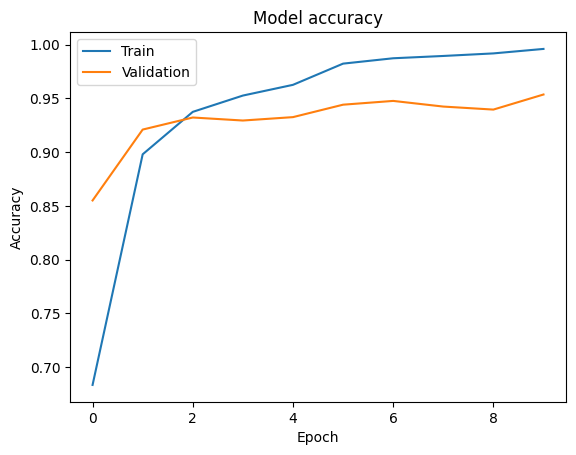

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In this figure we can see that already after 3rd epoch the model has been performing well.

In [13]:
model.save("my_keras_model2.keras")

# Predictions using convolutional neural network

223/223 ━━━━━━━━━━━━━━━━━━━━ 17s 74ms/step


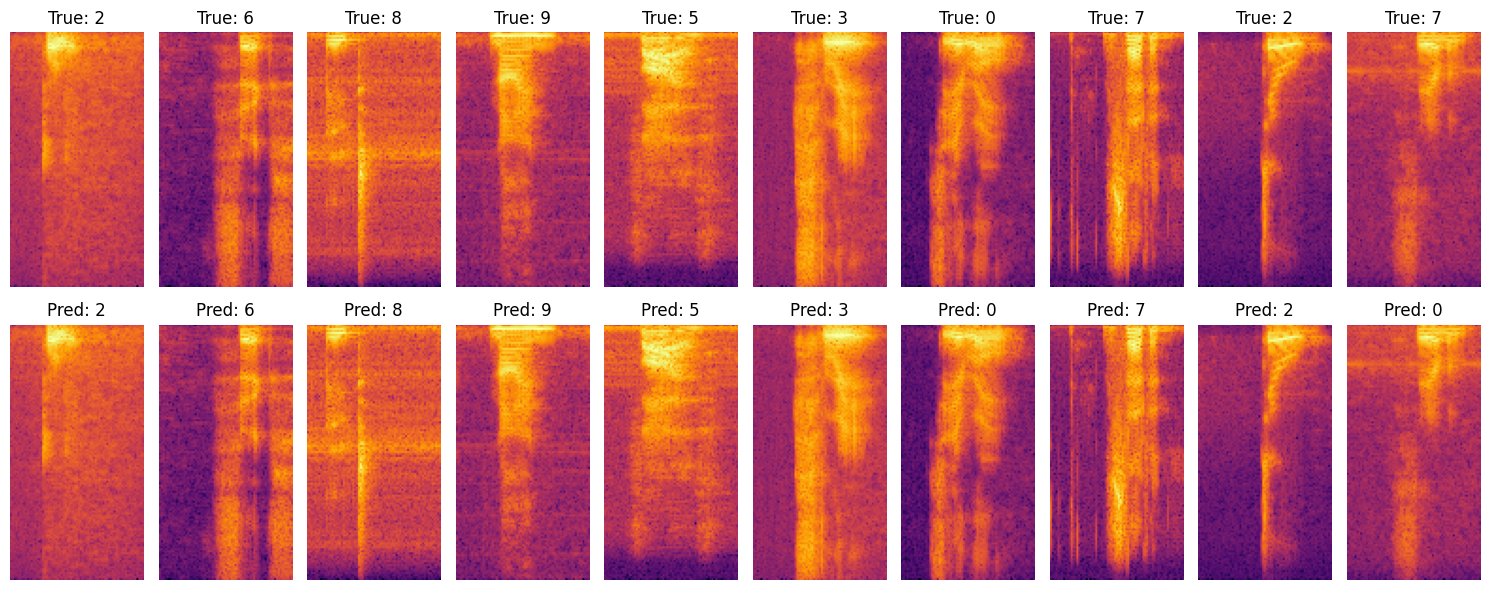

Prediction accuracy on the test set: 94.54%


In [14]:
model = tf.keras.models.load_model("my_keras_model2.keras")

# Generate predictions
predictions = model.predict(X_test)

# Convert the one-hot encoded predictions to the digit (class) by taking the argmax
predicted_digits = np.argmax(predictions, axis=1)

# Convert y_test back to integer labels
true_digits = np.argmax(y_test_one_hot, axis=1)

# Let's visualize the results for a few samples
num_samples = 10  # Change this to see more/less examples
plt.figure(figsize=(15, 6))

for i in range(num_samples):
    plt.subplot(2, num_samples, i + 1)  # Top row for true labels
    plt.imshow(X_test[i].reshape(129, 71), aspect='auto', cmap='inferno')  # Show spectrogram
    plt.title(f"True: {true_digits[i]}")
    plt.axis('off')

    plt.subplot(2, num_samples, i + 1 + num_samples)  # Bottom row for predicted labels
    plt.imshow(X_test[i].reshape(129, 71), aspect='auto', cmap='inferno')  # Show spectrogram
    plt.title(f"Pred: {predicted_digits[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Optional: Calculate the accuracy of predictions
accuracy = np.mean(predicted_digits == true_digits)
print(f"Prediction accuracy on the test set: {accuracy * 100:.2f}%")

The conclusion of this assignment is that convolutional neural network is much better at recognizing patterns than fully connected neural network. It is however very computationally heavy, but it achieves high accuracy very quickly compared to the fully connected neural network.

**Fully connected neural network:**

*   Train data accuracy = 0.95
*   Validation data accuracy = 0.87
*   Test data accuracy = 0.88
*   Amount of epochs to find perfect hyperparameters = 60
*   Prediction accuracy on test set = 87.85%
*   Pros: Fast
*   Cons: Takes a lot of adjustments to improve accuracy, doesnt perform very well with unseen data


**Convolutional neural network:**

*   Train data accuracy = 0.99
*   Validation data accuracy = 0.953
*   Test data accuracy = 0.945
*   Amount of epochs to find perfect hyperparameters = 10
*   Prediction accuracy on test set = 94.54%
*   Pros: Achieves high accuracy within few epochs, performs well with unseen data
*   Cons: Very heavy on the resources














